<a href="https://colab.research.google.com/github/najiaahmedd/CIND820_InitialResults/blob/main/InitialResults_Imputations%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
data1<-read.csv("projectfiles.csv")

In [3]:
install.packages("mice")
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Affected,Total.Deaths,No.Affected,Total.Damages...000.US..,No.Injured,No.Homeless,Insured.Damages...000.US..,Reconstruction.Costs...000.US..,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
42,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
268,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
5,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
155,1,1,1,1,1,1,1,1,1,1,1,0,1,0,2
4,1,1,1,1,1,1,1,1,1,1,1,0,0,1,2
671,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
22,1,1,1,1,1,1,1,1,1,1,0,1,1,0,2
196,1,1,1,1,1,1,1,1,1,1,0,1,0,0,3


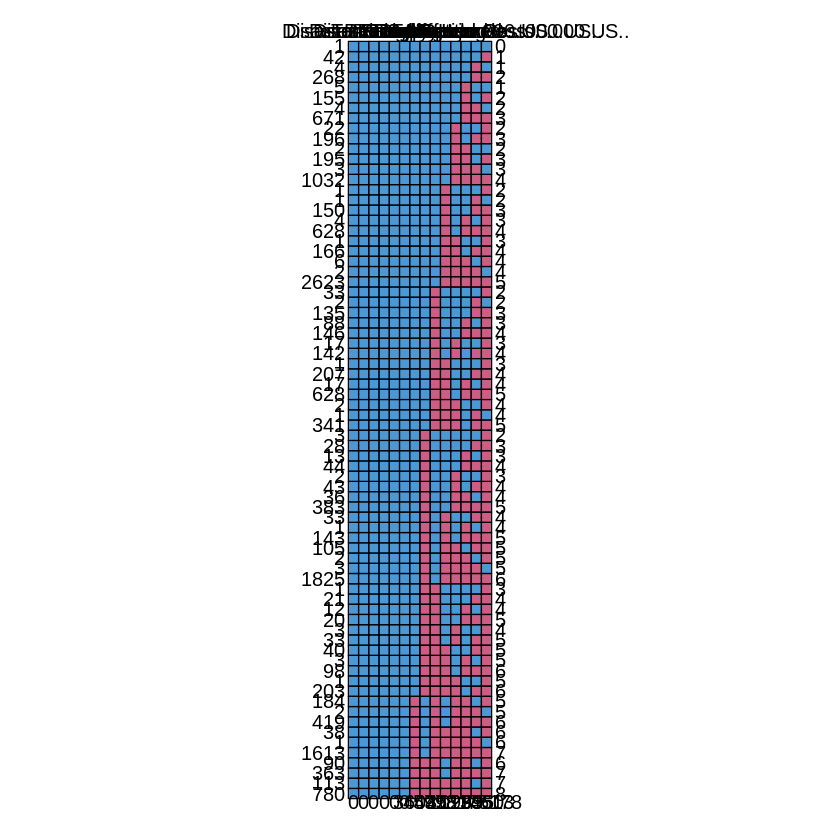

In [4]:
#removing some variables/attributes
dataclean<-subset(data1, select = c(Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))
md.pattern(dataclean)

In [5]:
mice:::find.collinear(dataclean)
dataclean1<-subset(data1, select = c(Total.Deaths, No.Injured, No.Affected, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))

cor(dataclean1, use = "pairwise.complete.obs")
#No. Affected and Total Affected have a collinearity that is 0.99999 indicating they have perfect collineatity
#Thus No. Affected needs to be removed before imputation 

[1] "No.Affected"

,Total.Deaths,No.Injured,No.Affected,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
Total.Deaths,1.00000000,0.23029825,0.04714071,0.13316123,0.04383559,0.0949518,0.39584620,0.00705798
No.Injured,0.23029825,1.00000000,0.13966666,0.39871032,0.13853338,0.2575439,0.40772389,-0.02082257
No.Affected,0.04714071,0.13966666,1.00000000,0.77494741,0.99970685,0.1152058,0.37079739,-0.02037620
No.Homeless,0.13316123,0.39871032,0.77494741,1.00000000,0.68365671,0.1543489,0.09025803,-0.01872690
Total.Affected,0.04383559,0.13853338,0.99970685,0.68365671,1.00000000,0.1140498,0.40412564,-0.01780564
Total.Damages...000.US..,0.09495180,0.25754393,0.11520577,0.15434894,0.11404976,1.0000000,0.93897341,0.79334165
Reconstruction.Costs...000.US..,0.39584620,0.40772389,0.37079739,0.09025803,0.40412564,0.9389734,1.00000000,0.63848304
Insured.Damages...000.US..,0.00705798,-0.02082257,-0.02037620,-0.01872690,-0.01780564,0.7933417,0.63848304,1.00000000


In [6]:
data2<-subset(data1, select = c(Disaster.Group,Disaster.Subgroup, Disaster.Type, Disaster.Subtype, Country, Region, Total.Deaths, No.Injured, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))


In [7]:
imputedData<-mice(data2, m=6, maxit=50, meth='pmm', seed=600)
summary(imputedData)


 iter imp variable
  1   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   2  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   3  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   4  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   5  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  1   6  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...000.US..  Reconstruction.Costs...000.US..  Insured.Damages...000.US..
  2   1  Total.Deaths  No.Injured  No.Homeless  Total.Affected  Total.Damages...

Warning message:
“Number of logged events: 46”


Class: mids
Number of multiple imputations:  6 
Imputation methods:
                 Disaster.Group               Disaster.Subgroup 
                             ""                              "" 
                  Disaster.Type                Disaster.Subtype 
                             ""                              "" 
                        Country                          Region 
                             ""                              "" 
                   Total.Deaths                      No.Injured 
                          "pmm"                           "pmm" 
                    No.Homeless                  Total.Affected 
                          "pmm"                           "pmm" 
       Total.Damages...000.US.. Reconstruction.Costs...000.US.. 
                          "pmm"                           "pmm" 
     Insured.Damages...000.US.. 
                          "pmm" 
PredictorMatrix:
                  Disaster.Group Disaster.Subgroup Disaster.Type
Disa

In [8]:
completedata<-complete(imputedData, 1)

In [9]:
summary(completedata)

 Disaster.Group     Disaster.Subgroup  Disaster.Type      Disaster.Subtype  
 Length:14644       Length:14644       Length:14644       Length:14644      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Country             Region           Total.Deaths      No.Injured     
 Length:14644       Length:14644       Min.   :     1   Min.   :      1  
 Class :character   Class :character   1st Qu.:     6   1st Qu.:     13  
 Mode  :character   Mode  :character   Median :    18   Median :     51  
                                       Mean   :   345   Mean   :   2171  
                                       3rd Qu.:    54   3rd Qu.:    228  
                 

In [10]:
completedata

Disaster.Group,Disaster.Subgroup,Disaster.Type,Disaster.Subtype,Country,Region,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Natural,Hydrological,Flood,,Argentina,South America,36,200,26923,423,25000,194000,10000
Natural,Meteorological,Storm,Tropical cyclone,Australia,Australia and New Zealand,13,1,200,35020,72475,1510,60000
Natural,Hydrological,Flood,,Benin,Western Africa,9,26,826,450,200,150000,60000
Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Southern Asia,300000,5933,300000,3648000,86400,194000,115000
Natural,Meteorological,Storm,,Bangladesh,Southern Asia,17,12,75,110,210000,194000,200500
Natural,Hydrological,Flood,,Bangladesh,Southern Asia,6908,155715,125000,10000000,25000,9450000,400000
Natural,Meteorological,Storm,,Bangladesh,Southern Asia,300,4,3000,3500,1730000,194000,910000
Natural,Climatological,Drought,Drought,Brazil,South America,3840,100,11000000,10000000,100,194000,50000
Natural,Hydrological,Flood,,Brazil,South America,172,643,1000,104371,46000,78000,60000


In [11]:
library(magrittr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
library(magrittr)
completedata %>% count(Disaster.Type)

Disaster.Type,n
<chr>,<int>
Animal accident,1
Drought,685
Earthquake,1137
Epidemic,1436
Extreme temperature,584
Flood,5272
Glacial lake outburst,2
Impact,1
Insect infestation,93


In [13]:
library(ggplot2)

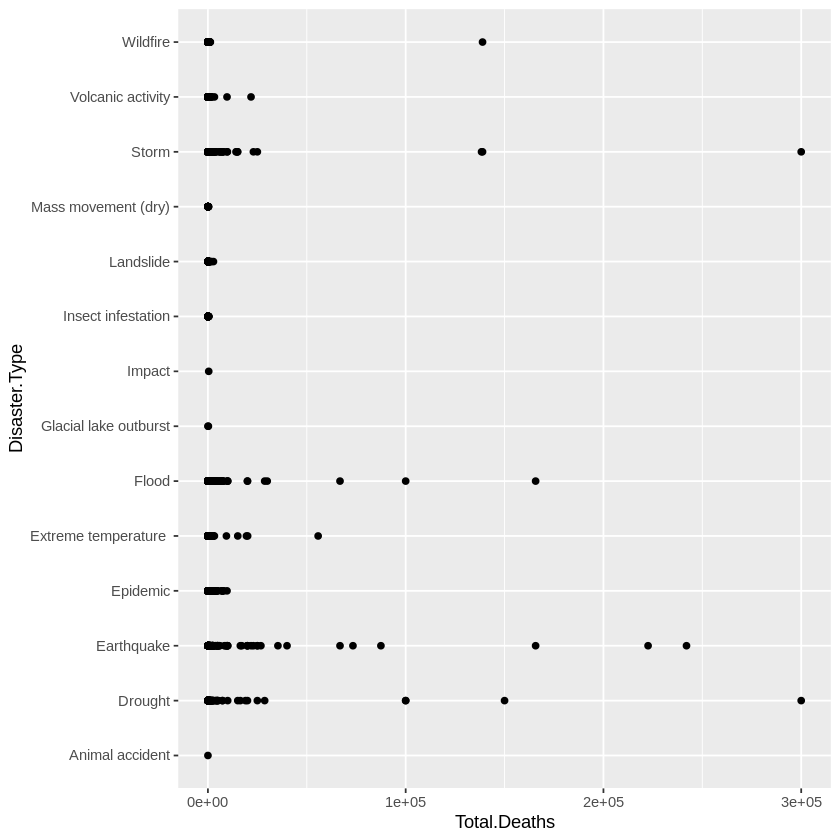

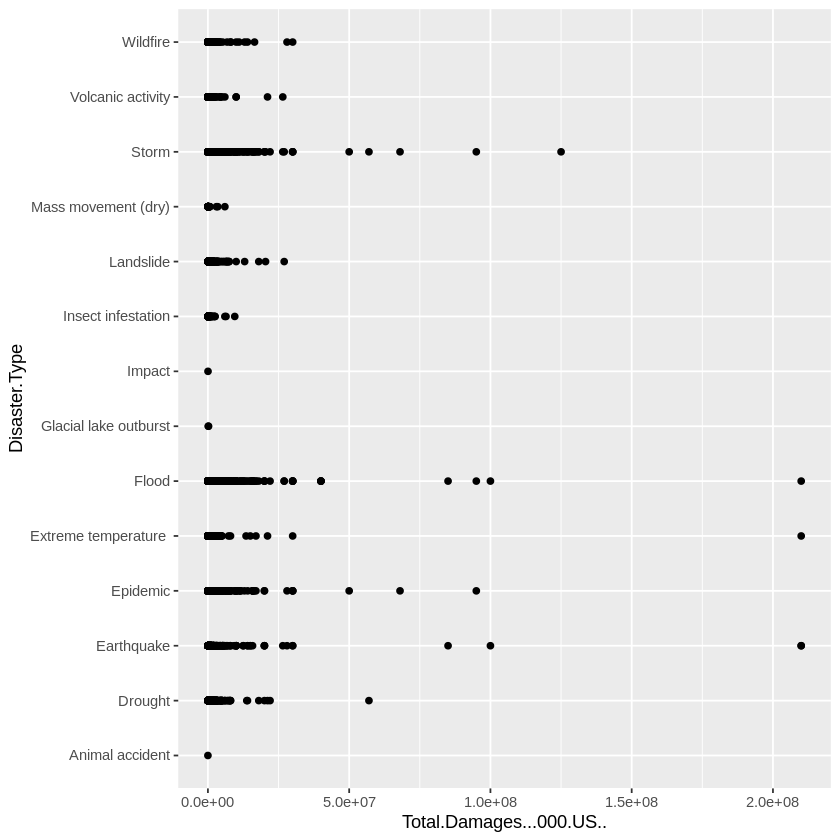

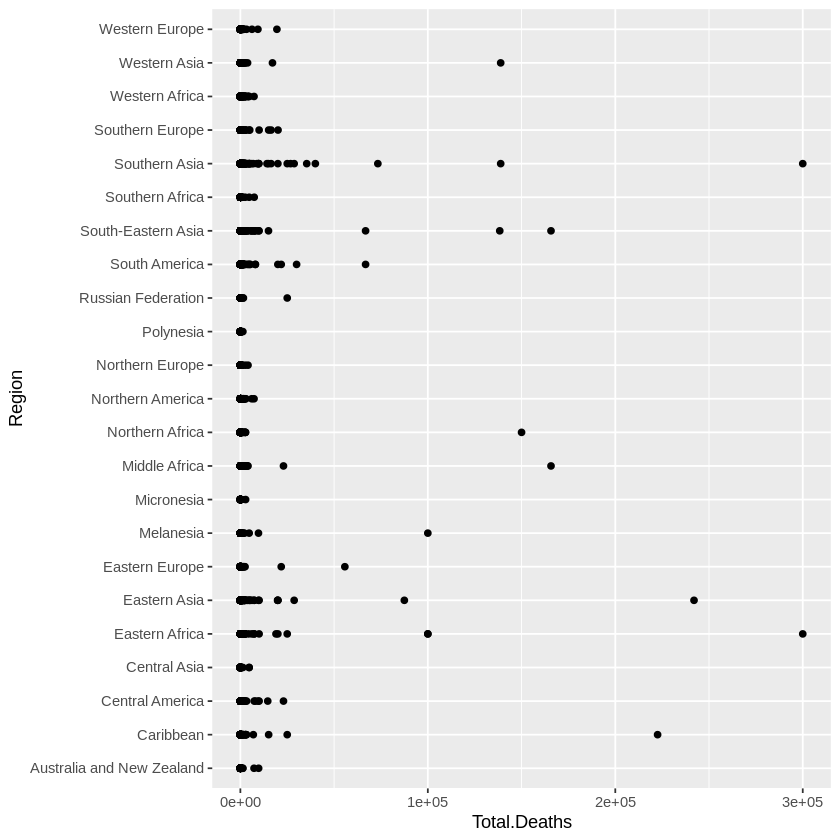

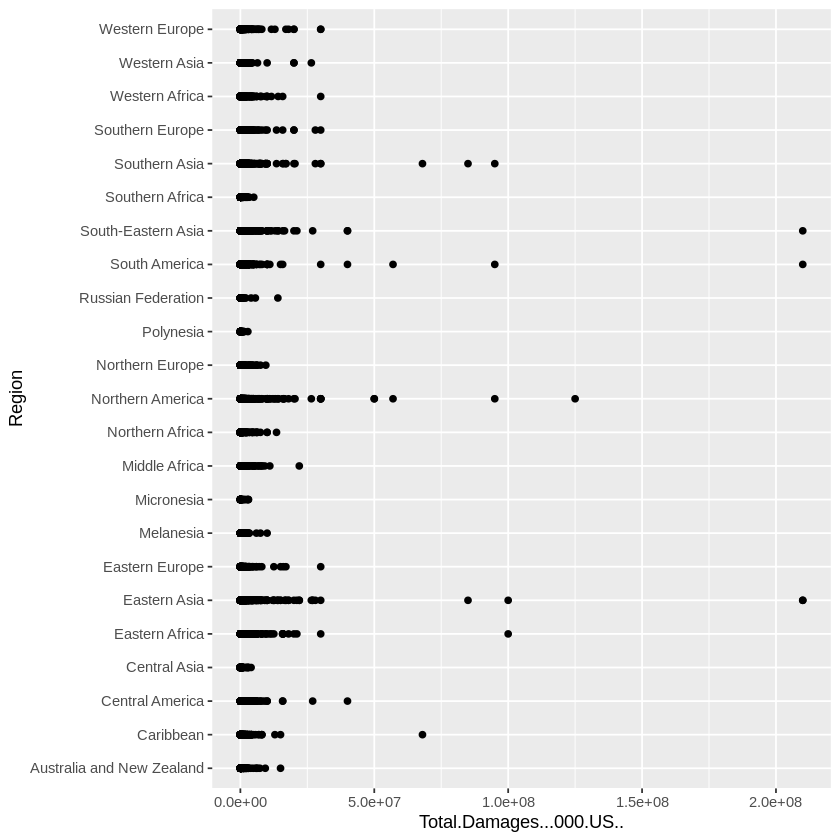

In [40]:
#Plots to compare the economic damages of natural disasters based on deaths 
#and damage costs for different disaster types and countries/regions

#Total deaths vs Disaster Type
ggplot(completedata, aes(x = Total.Deaths, y = Disaster.Type)) +
    geom_point()

#Total Damages vs Disaster Type
ggplot(completedata, aes(x = Total.Damages...000.US.., y = Disaster.Type)) +
    geom_point()

#Total deaths vs country
ggplot(completedata, aes(x = Total.Deaths, y = Region)) +
    geom_point()
#Total damages vs country
ggplot(completedata, aes(x = Total.Damages...000.US.., y = Region)) +
    geom_point()


In [15]:
library(cluster)    # clustering algorithms
#Looking to see which economic damage has the higher effect, is there a particular category that stands out?

In [16]:
library(stats)

In [17]:
install.packages("tidyverse")
install.packages("purrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
#Need to remove categorical data for K-means 
mydata<-subset(completedata, select = c(Total.Deaths, No.Injured, No.Homeless, Total.Affected, Total.Damages...000.US.., Reconstruction.Costs...000.US.., Insured.Damages...000.US..))



Attaching package: ‘purrr’


The following object is masked from ‘package:magrittr’:

    set_names


Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iteratio

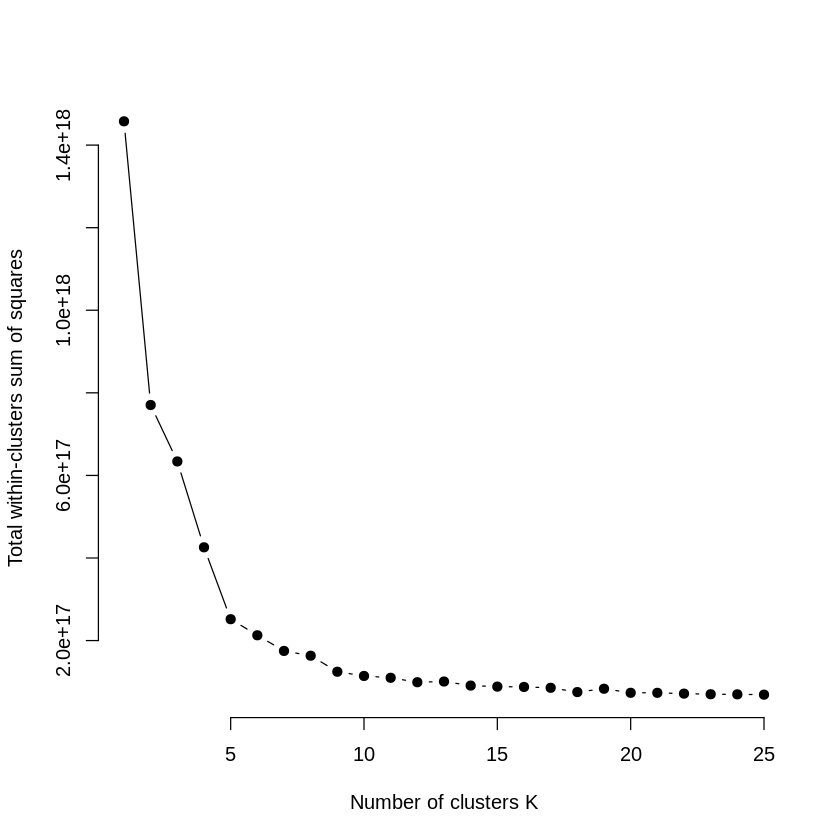

In [19]:
#Optimal number of clusters using elbow method
library(purrr)
set.seed(123)
wss <- function(k) {
  kmeans(mydata, k, nstart = 25 )$tot.withinss
}
k.values <- 1:25
wss_values <- map_dbl(k.values, wss)
plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")


In [48]:
#We can see in the table above that the elbow dips at 5 so 5-10 centres is the most appropriate
set.seed(123)
k2 <- kmeans(mydata, centers = 5, nstart = 25)
str(k2)
head(k2)

List of 9
 $ cluster     : Named int [1:14644] 2 2 2 2 2 3 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:14644] "1" "2" "3" "4" ...
 $ centers     : num [1:5, 1:7] 759 252 1939 1545 8225 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:7] "Total.Deaths" "No.Injured" "No.Homeless" "Total.Affected" ...
 $ totss       : num 1.46e+18
 $ withinss    : num [1:5] 1.80e+16 3.16e+16 1.27e+17 2.25e+16 5.24e+16
 $ tot.withinss: num 2.52e+17
 $ betweenss   : num 1.21e+18
 $ size        : int [1:5] 8 13879 715 28 14
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
1,759.0000,30518.3750,8518750.00,272400653.4,6485715.2,13112500,257775.0
2,252.3407,595.4578,50639.52,182825.7,424906.9,347263,201687.5
3,1938.5259,26964.3888,433160.67,4575661.6,5453235.8,10846510,2475975.2
4,1544.7143,53193.2500,4688329.29,98237177.4,6485341.6,14317857,464078.6
5,8225.0714,180035.1429,1724440.50,3794093.1,125428571.4,14425000,26553571.4


In [49]:
library(cluster)
install.packages("fpc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Total.Deaths,No.Injured,No.Homeless,Total.Affected,Total.Damages...000.US..,Reconstruction.Costs...000.US..,Insured.Damages...000.US..
1,759.0000,30518.3750,8518750.00,272400653.4,6485715.2,13112500,257775.0
2,252.3407,595.4578,50639.52,182825.7,424906.9,347263,201687.5
3,1938.5259,26964.3888,433160.67,4575661.6,5453235.8,10846510,2475975.2
4,1544.7143,53193.2500,4688329.29,98237177.4,6485341.6,14317857,464078.6
5,8225.0714,180035.1429,1724440.50,3794093.1,125428571.4,14425000,26553571.4


[1]     8 13879   715    28    14

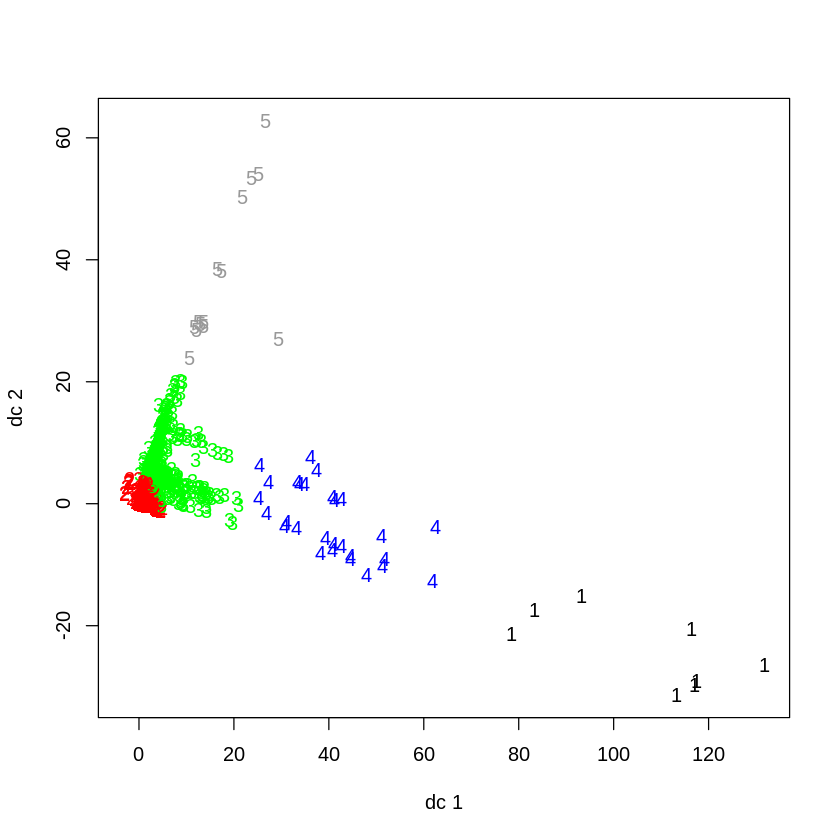

In [52]:
#visualization of the clusters
k2$centers
k2$size
library(fpc)
plotcluster(mydata, k2$cluster)
#High number of injuries 

In [53]:
#Lets take a look at the frequency clusters and see if there is a trend 
#Creating a bar chart first to investigate year vs. # of disasters 